<a href="https://colab.research.google.com/github/joaorosa2/analise_combustiveis_brasil/blob/main/ProjetoM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol no Brasil com dados dos meses de julho e agosto.

#<font color = orange> Importando bibliotecas e arquivos

In [258]:
#Importando as bibliotecas necessariass para as analises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
#Importando os dados necessarios para realizar as analises 
tabelaAgosto  = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Agosto.csv',sep= ';',engine= 'python')
tabelaJulho = pd.read_csv('https://raw.githubusercontent.com/joaorosa2/analise_combustiveis_brasil/main/precos-gasolina-etanol-Julho.csv',sep= ';',engine= 'python')

# **Consultando os dados**

<font color = orange> Mês de Julho

In [260]:
#Consultando a quantidade de linhas e colunas do dataframe de julho.
tabelaJulho.shape

(57632, 16)

In [261]:
#Consultando as 5 primeiras linhas.
tabelaJulho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


In [262]:
#Consultando as 5 últimas linhas.
tabelaJulho.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,32.924.614/0001-56,RUA CASTRO ALVES,2400,NaN,CATALAO,35501-205,GASOLINA,29/07/2022,"5,38",NaN,R$ / litro,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA ADITIVADA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA
57631,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA


In [263]:
#Descrição das colunas
display(tabelaJulho.dtypes)

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

<font color = orange> Mês de Agosto

In [264]:
##Consultando a quantidade de linhas e colunas do dataframe de agosto.
tabelaAgosto.shape

(69544, 16)

In [265]:
#Consultando as  primeiras linhas.
tabelaAgosto.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


In [266]:
#Consultando as 5 últimas linhas.
tabelaAgosto.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,31/08/2022,"3,99",NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,31/08/2022,"5,27",NaN,R$ / litro,BRANCA
69543,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,ETANOL,31/08/2022,"3,67",NaN,R$ / litro,BRANCA


In [267]:
#Descrição das colunas
display(tabelaAgosto.dtypes)

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

**Buscando informações a porcentagem de colunas que possuem valores ausentes**

In [268]:
(tabelaAgosto.isnull().sum() / tabelaAgosto.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.785215
Bairro               0.003135
Numero Rua           0.000518
Regiao - Sigla       0.000000
Estado - Sigla       0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

**Resultado:**
*   Foi possivel identificar que nenhum ponto de revenda declarou o valor de compra dos combustiveis, pois a coluna **`Valor de Compra`** possui todos os valores ausentes(NaN).
*   A coluna **`Complemento`**, sendo uma informação extra de localização possui 78% dos valores ausentes(NaN).
*   As colunas **`Bairro`** e **`Numero Rua`** possuem aproximadamente 0,1% dos valores ausentes(NaN).
*   As demais colunas não possuem valores ausentes.



In [269]:
tabelaAgosto[['Valor de Venda']].describe()

,Valor de Venda
count,69544
unique,401
top,"5,49"
freq,3280


#<font color = orange> Limpeza e adaptação dos dados:

Mudando o tipo da coluna "Valor de venda" para float.
1. Função lambda para trocar Virgula por ponto com o "replace";
2. "astype" para mudar de string para float.



In [270]:
colocaPonto = lambda x: x.replace(',','.')

tabelaJulho['Valor de Venda'] =(tabelaJulho['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)
tabelaAgosto['Valor de Venda'] = (tabelaAgosto['Valor de Venda'].apply(colocaPonto)).astype(str).astype(float)

* Retirando as colunas **Nome da Rua**, **Numero Rua** e **Complemento** para limpar os dados da **tabelaJulho** e **tabelaAgosto** do nosso dataframe.

* Transformando a data de **String** para **DateTime**.

In [271]:
# ----------------------JULHO------------------------------#
tabelaAgosto = tabelaAgosto.drop('Nome da Rua', axis=1)
tabelaAgosto = tabelaAgosto.drop('Numero Rua', axis=1)
tabelaAgosto = tabelaAgosto.drop('Complemento', axis=1)
tabelaAgosto = tabelaAgosto.drop('Valor de Compra',axis=1)

# ------------TRANSFORMANDO O FORMATO DA COLUNA-------------#
tabelaAgosto['Data da Coleta'] = pd.to_datetime(tabelaAgosto['Data da Coleta'],format = '%d/%m/%Y')
tabelaJulho['Data da Coleta'] = pd.to_datetime(tabelaJulho['Data da Coleta'],format = '%d/%m/%Y')

# ----------------------AGOSTO------------------------------#
tabelaJulho = tabelaJulho.drop('Nome da Rua', axis=1)
tabelaJulho = tabelaJulho.drop('Numero Rua', axis=1)
tabelaJulho = tabelaJulho.drop('Complemento', axis=1)
tabelaJulho = tabelaJulho.drop('Valor de Compra',axis=1)

In [272]:
# ----------------------UNINDO-DATAFRAMES--------------------#
concateTabelas = pd.concat([tabelaJulho, tabelaAgosto], axis=0, ignore_index=True)
concateTabelas.head()


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,LACE,29703-055,ETANOL,2022-07-01,5.99,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,LACE,29703-055,GASOLINA,2022-07-01,7.39,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,2022-07-01,6.49,R$ / litro,IPIRANGA


**Consultando as colunas**

In [273]:
tabelaAgosto.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,BOM SUCESSO,57309-035,ETANOL,2022-08-01,4.79,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,BOM SUCESSO,57309-035,GASOLINA,2022-08-01,5.59,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,PLANALTO,57308-000,GASOLINA ADITIVADA,2022-08-01,5.99,R$ / litro,BRANCA


#<font color = orange> 1- Como se comportaram os preços dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma de queda ou aumento?

**Resultado:**


*   Conseguimos identificar que no mês de julho a média dos preços dos combustíveis foi maior do que no mês de agosto.

*   Além da tabela, apresentamos um gráfico em barra para uma melhor comparação dos preços.

<font color = orange> Mês de Julho

In [274]:
#Realizando o agrupamento dos produto e calculando a média do mês de julho.
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


<font color = orange>Mês de Agosto

In [275]:
#Realizando o agrupamento dos produto e calculando a média do mês de agosto.
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


##<font color = orange> Apresentação gráfica dos meses de julho e agosto

Descrição visual da alteraçâo das médias dos preços dos combustiveis nos meses de julho e agosto de 2022.

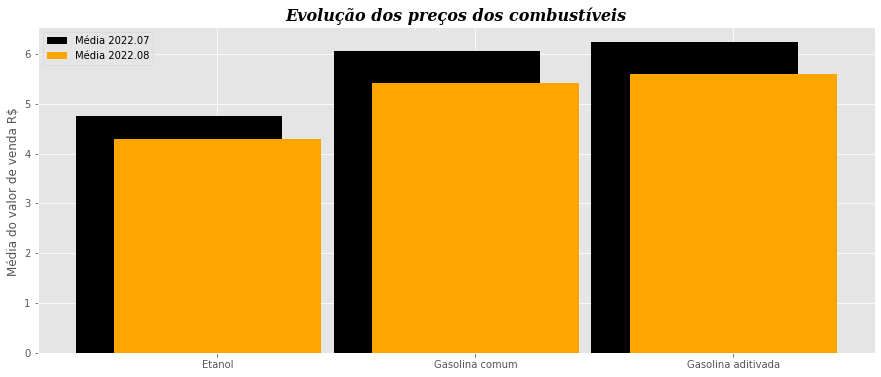

In [276]:
#Utilizando a biblioteca do matplotlib para a plotagem do grafico em barras comparando os preços. 
rotulos = ['Etanol','Gasolina comum','Gasolina aditivada']
ind = np.arange(len(rotulos))
width = 0.6
plt.figure(figsize=(15,6))

plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')
plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.ylabel('Média do valor de venda R$ ')
plt.legend(fontsize=12, facecolor='white')
plt.title('Evolução dos preços dos combustíveis', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='serif' )
plt.xticks(location, rotulos)
plt.legend()
plt.show()

#<font color = orange>2- Qual o preço médio da gasolina e do etanol nesses dois meses?

O objetivo desta pergunta foi apresentar a média da união dos preços dos meses de julho e agosto. 

Através desta pergunta o objetivo é apresentar a média dos combustiveis nos meses de julho e agosto.

O código foi dividido em duas etapas para uma melhor descrição das informações. A segunda descreve a pergunta em partes, diferente da primeira que busca uma análise dos dataframes em cojunto. 

In [277]:
#média dos meses de julho e agosto.
concateTabelas[['Valor de Venda']].groupby([concateTabelas['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.506026
GASOLINA,5.711579
GASOLINA ADITIVADA,5.887813


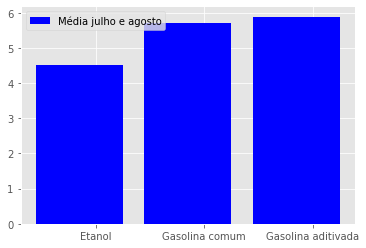

In [278]:
#Apresentação gráfica da media dos combustíveis dos dois meses.
rotulos = ['Etanol','Gasolina comum','Gasolina aditivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(concateTabelas['Valor de Venda'].groupby(concateTabelas['Produto']).mean()), color='blue', label='Média julho e agosto')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

**Nesta etapa realizamos uma complementação a pergunta 2, sendo assim, descrevemos os valores médios também divididos por mês.**

<font color = orange> Mês de Julho

In [279]:
#Média do valor dos produtos no mês de julho.
tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto']]).mean()

,Valor de Venda
Produto,
ETANOL,4.759239
GASOLINA,6.059047
GASOLINA ADITIVADA,6.238814


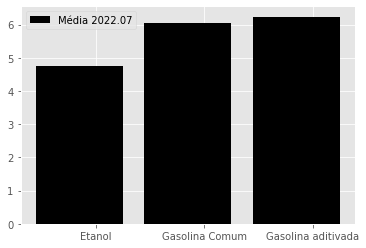

In [280]:
#Apresentação gráfica da média dos combustíveis no mês de julho.
rotulos = ['Etanol','Gasolina Comum','Gasolina aditivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2207 = plt.bar(ind, list(tabelaJulho['Valor de Venda'].groupby(tabelaJulho['Produto']).mean()), color='black', label='Média 2022.07')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

<font color = orange>Mês de Agosto

In [281]:
#Média do valor dos produtos no mês de agosto.
tabelaAgosto[['Valor de Venda']].groupby(tabelaAgosto['Produto']).mean()

,Valor de Venda
Produto,
ETANOL,4.296892
GASOLINA,5.423378
GASOLINA ADITIVADA,5.596107


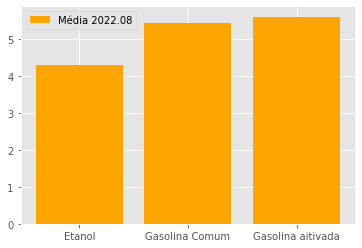

In [282]:
#Apresentação gráfica da média dos combustíveis no mês de agosto.
rotulos = ['Etanol','Gasolina Comum','Gasolina aitivada']
ind = np.arange(len(rotulos))
width = 0.6

bar_2208 = plt.bar(ind+width/4,list(tabelaAgosto['Valor de Venda'].groupby(tabelaAgosto['Produto']).mean()), color='orange', label='Média 2022.08')

location = ind+width/4
rotulos=rotulos
plt.xticks(location, rotulos)
plt.legend();

#<font color = orange> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Nesta etapa apresentamos os cinco estados que apresentam as maiores médias para o **`etanol`**, **`gasolina comum`** e **`gasolina aditivada`**.
 Apresentamos está analise em duas etapas, sendo uma do mês de julho e a outra no mês de agosto.

<font color = orange> Mês de Julho

In [283]:
#Agrupando os produtos, os estados e realizando o calculo da médias dos valores de venda. 
mediaPorEstadoJulho = tabelaJulho.groupby(['Produto','Estado - Sigla'])[['Valor de Venda']].mean()

#Buscando as 5 maiores médias do etanol no Brasil.
maxEtanol = mediaPorEstadoJulho.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxEtanol['Produto'] = 'ETANOL'

#Buscando as 5 maiores médias da gasolina comum no Brasil.
maxGasolina = mediaPorEstadoJulho.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxGasolina['Produto'] = 'GASOLINA'

#Buscando as 5 maiores médias da gasolina aditivada no Brasil.
maxAditivada = mediaPorEstadoJulho.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

#Concatenando as variáveis e apresentando em um único dataframe.
concatMax = pd.DataFrame(pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index())

concatMax.set_index('Produto')



,Estado - Sigla,Valor de Venda
Produto,,
ETANOL,AP,5.976667
ETANOL,PA,5.942328
ETANOL,RS,5.940913
ETANOL,RO,5.909449
ETANOL,RN,5.886059
GASOLINA,AM,6.614281
GASOLINA,PI,6.607518
GASOLINA,RN,6.565826
GASOLINA,BA,6.502605


<font color = orange> Mês de Agosto

In [284]:
#Agrupando os produtos, os estados e realizando o calculo da médias dos valores de venda. 
mediaPorEstadoAgosto = tabelaAgosto.groupby(['Produto','Estado - Sigla'])[['Valor de Venda']].mean()

#Buscando as 5 maiores médias do etanol no Brasil.
maxEtanol = mediaPorEstadoAgosto.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxEtanol['Produto'] = 'ETANOL'

#Buscando as 5 maiores médias da gasolina comum no Brasil.
maxGasolina = mediaPorEstadoAgosto.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxGasolina['Produto'] = 'GASOLINA'

#Buscando as 5 maiores médias da gasolina aditivada no Brasil.
maxAditivada = mediaPorEstadoAgosto.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(5)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

#Concatenando as variáveis e apresentando em um único dataframe.
concatMax = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMax


,Estado - Sigla,Valor de Venda,Produto
0,AP,5.655000,ETANOL
1,RR,5.467778,ETANOL
2,RS,5.426271,ETANOL
3,PA,5.349541,ETANOL
4,RO,5.348089,ETANOL
5,AC,5.978333,GASOLINA
6,AM,5.846126,GASOLINA
7,RR,5.785077,GASOLINA
8,TO,5.746133,GASOLINA
9,PA,5.708955,GASOLINA


#<font color = orange> 4- Qual o preço médio da gasolina e do etanol por estado?

O objetivo desta pergunta é apresentar o preço médio dos meses de julho e agosto dos combustíveis por estado. 

In [285]:
#Copiando o dataframe
newdf = concateTabelas[['Valor de Venda']].groupby([concateTabelas['Produto'], concateTabelas['Estado - Sigla']]).mean()
newdf

Valor de Venda
Produto            Estado - Sigla                
ETANOL             AC                    5.376684
                   AL                    5.240854
                   AM                    4.952985
                   AP                    5.896250
                   BA                    5.074360
...                                           ...
GASOLINA ADITIVADA RS                    5.767893
                   SC                    5.782513
                   SE                    5.675429
                   SP                    5.773200
                   TO                    6.176667

[81 rows x 1 columns]

In [286]:
#Alterando o nome da coluna
newdf.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
newdf

Média do Valor
Produto            Estado - Sigla                
ETANOL             AC                    5.376684
                   AL                    5.240854
                   AM                    4.952985
                   AP                    5.896250
                   BA                    5.074360
...                                           ...
GASOLINA ADITIVADA RS                    5.767893
                   SC                    5.782513
                   SE                    5.675429
                   SP                    5.773200
                   TO                    6.176667

[81 rows x 1 columns]

**Nesta etapa realizamos uma complementação a pergunta 2, sendo assim, descrevemos os valores médios também divididos por mês.**

In [287]:
#Realizando os calculos da média dos produtos por estado no mês de julho
dfjulho = tabelaJulho[['Valor de Venda']].groupby([tabelaJulho['Produto'], tabelaJulho['Estado - Sigla']]).mean()
dfjulho

Valor de Venda
Produto            Estado - Sigla                
ETANOL             AC                    5.680833
                   AL                    5.484825
                   AM                    5.203815
                   AP                    5.976667
                   BA                    5.437953
...                                           ...
GASOLINA ADITIVADA RS                    6.109490
                   SC                    6.048292
                   SE                    6.172516
                   SP                    6.075090
                   TO                    6.508958

[81 rows x 1 columns]

In [288]:
#Alterando o nome da coluna
dfjulho.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfjulho

Média do Valor
Produto            Estado - Sigla                
ETANOL             AC                    5.680833
                   AL                    5.484825
                   AM                    5.203815
                   AP                    5.976667
                   BA                    5.437953
...                                           ...
GASOLINA ADITIVADA RS                    6.109490
                   SC                    6.048292
                   SE                    6.172516
                   SP                    6.075090
                   TO                    6.508958

[81 rows x 1 columns]

In [289]:
#Realizando os calculos da média dos produtos por estado no mês de agosto
dfagosto = tabelaAgosto[['Valor de Venda']].groupby([tabelaAgosto['Produto'], tabelaAgosto['Estado - Sigla']]).mean()

In [290]:
#Alterando o nome das colunas
dfagosto.rename(columns={'Valor de Venda':'Média do Valor'},inplace=True)
dfagosto

Média do Valor
Produto            Estado - Sigla                
ETANOL             AC                    5.128641
                   AL                    5.030152
                   AM                    4.763493
                   AP                    5.655000
                   BA                    4.770243
...                                           ...
GASOLINA ADITIVADA RS                    5.468107
                   SC                    5.558880
                   SE                    5.261623
                   SP                    5.523399
                   TO                    5.889279

[81 rows x 1 columns]

#<font color = orange> 5. Qual o município que possui o menor preço para a gasolina e para o etanol?

**A equipe buscou com essa pergunta apresentar os municipios que possuem os menores preços para os produtos analisados.**

In [291]:
#Criando uma variável com objetivo de armazenar os produtos, municipios e o menor valor de venda do produto no mês de julho.  
mediaPorMunicipio = concateTabelas.groupby(['Produto','Municipio'])[['Valor de Venda']].mean()

#Selecionando o município com o menor preço para o etanol no Brasil.
minEtanol = mediaPorMunicipio.query('Produto == "ETANOL"').sort_values(by='Valor de Venda',ascending = True).head(1)


#Selecionando o município com o menor preço para o gasolina comum no Brasil.
minGasolina = mediaPorMunicipio.query('Produto == "GASOLINA"').sort_values(by='Valor de Venda',ascending = True).head(1)


#Selecionando o município com o menor preço para o gasolina aditivada no Brasil.
minAditivada = mediaPorMunicipio.query('Produto == "GASOLINA ADITIVADA"').sort_values(by='Valor de Venda',ascending = True).head(1)


#Concatenando as variáveis e apresentando em um único dataframe.
concatMin = pd.concat([minEtanol,minGasolina,minAditivada]).reset_index()
concatMin

,Produto,Municipio,Valor de Venda
0,ETANOL,JOSE BONIFACIO,3.545111
1,GASOLINA,MACAPA,5.106651
2,GASOLINA ADITIVADA,GARCA,5.264800


In [292]:
correlacao = tabelaJulho.corr()
correlacao
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlacao, annot=True)
# plt.show()

,Valor de Venda
Valor de Venda,1.0



#<font color = orange> 6 - Qual o município que possui o maior preço para a gasolina e para o etanol?


A equipe buscou com essa pergunta apresentar os municípios que possuem os maiores preços para os produtos analisados.

In [293]:
#Criando uma variável com objetivo de armazenar os produtos, municipios e o maiores valor de venda do produto.  
maximoPorMunicipio = concateTabelas.groupby(['Produto','Municipio'])[['Valor de Venda']].mean()

#Selecionando o município com o maior preço para o etanol no Brasil.
maxEtanol = maximoPorMunicipio.loc['ETANOL'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxEtanol['Produto'] = 'ETANOL'

#Selecionando o município com o maior preço para o gasolina comum no Brasil.
maxGasolina = maximoPorMunicipio.loc['GASOLINA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxGasolina['Produto'] = 'GASOLINA'

#Selecionando o município com o maior preço para o gasolina aditivada no Brasil.
maxAditivada = maximoPorMunicipio.loc['GASOLINA ADITIVADA'].sort_values(by='Valor de Venda',ascending = False).head(1)
maxAditivada['Produto'] = 'GASOLINA ADITIVADA'

#Concatenando as variáveis e apresentando em um único dataframe.
concatMax2 = pd.concat([maxEtanol,maxGasolina,maxAditivada]).reset_index()
concatMax2

,Municipio,Valor de Venda,Produto
0,BAGE,6.724545,ETANOL
1,TEFE,7.263559,GASOLINA
2,JAGUAQUARA,7.072273,GASOLINA ADITIVADA


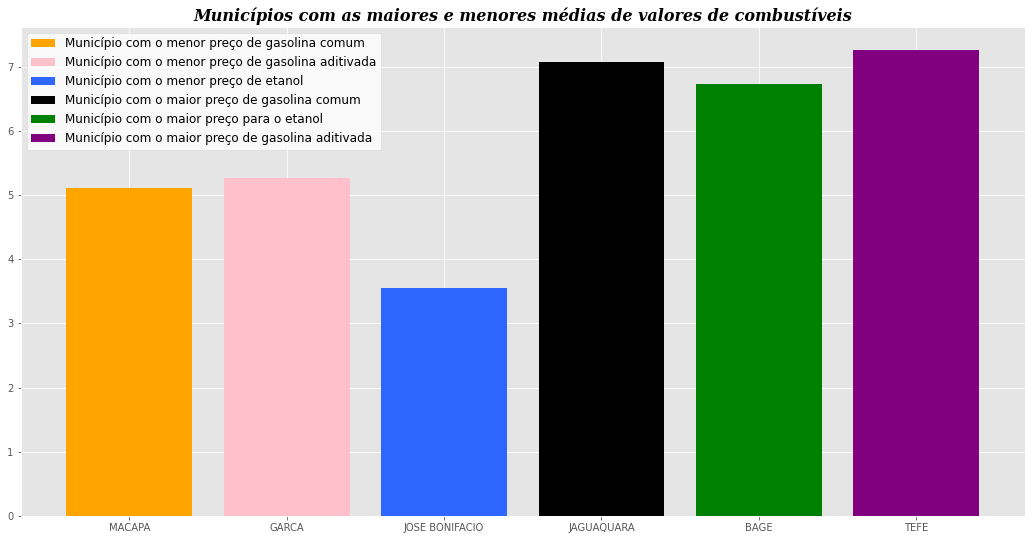

In [294]:
#Representação grafica dos municípios com os maiores e menores valores de combustíveis do Brasil
plt.figure(figsize=(18,9))

plot = plt.bar(concatMin[concatMin['Produto']=='GASOLINA']['Municipio'], concatMin[concatMin['Produto']=='GASOLINA']['Valor de Venda'],
    label='Município com o menor preço de gasolina comum', color='orange')

plot = plt.bar(concatMin[concatMin['Produto']=='GASOLINA ADITIVADA']['Municipio'], concatMin[concatMin['Produto']=='GASOLINA ADITIVADA']['Valor de Venda'],
    label='Município com o menor preço de gasolina aditivada', color='Pink')

plt.bar(concatMin[concatMin['Produto']=='ETANOL']['Municipio'], concatMin[concatMin['Produto']=='ETANOL']['Valor de Venda'],
    label='Município com o menor preço de etanol',color='#2f66fe')

plt.bar(concatMax2[concatMax2['Produto']=='GASOLINA ADITIVADA']['Municipio'], concatMax2[concatMax2['Produto']=='GASOLINA ADITIVADA']['Valor de Venda'],
    label='Município com o maior preço de gasolina comum', color='black')

plt.bar(concatMax2[concatMax2['Produto']=='ETANOL']['Municipio'], concatMax2[concatMax2['Produto']=='ETANOL']['Valor de Venda'],
    label='Município com o maior preço para o etanol',color='green')

plt.bar(concatMax2[concatMax2['Produto']=='GASOLINA']['Municipio'], concatMax2[concatMax2['Produto']=='GASOLINA']['Valor de Venda'],
    label='Município com o maior preço de gasolina aditivada', color='purple')

plt.title('Municípios com as maiores e menores médias de valores de combustíveis', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='serif' )
plt.legend(fontsize=12, facecolor='white')

plt.show()

#<font color = orange> 7 - Qual a região que possui o maior valor médio da gasolina?

A partir desta pergunta foi possivel apresentar dentre as 5 regiões do Brasil a que apresenta o maior valor para a gasolina. 
Foram analisados os meses de julho e agosto e também a média da união dos dois meses. 

<Font color = orange> Mês de agosto e julho:

In [295]:
meanRegioesGasolina = concateTabelas[['Regiao - Sigla','Valor de Venda','Produto']].query('Produto == "GASOLINA"').groupby(concateTabelas['Regiao - Sigla']).mean()

meanRegioesGasolina.sort_values(by='Valor de Venda',ascending = False).head(1)

,Valor de Venda
Regiao - Sigla,
N,5.972082


#<font color = orange> 8 - Qual a região que possui o menor valor médio do etanol?

A partir desta pergunta foi possivel apresentar dentre as 5 regiões do Brasil a que apresenta o menor valor para o etanol. Foram analisados os meses de julho e agosto e também a média da união dos dois meses.

<Font color = orange> Mês de agosto e julho:

In [296]:
meanRegioesEtanol = concateTabelas[['Regiao - Sigla','Valor de Venda','Produto']].query('Produto == "ETANOL"').groupby(concateTabelas['Regiao - Sigla']).mean()

meanRegioesEtanol.sort_values(by='Valor de Venda',ascending = True).head(1)

,Valor de Venda
Regiao - Sigla,
CO,4.107305


#<font color = orange> 9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

<Font color = orange> Mês de Julho:

In [ ]:
correlacaoJulho = tabelaJulho.groupby(tabelaJulho['Regiao - Sigla']).corr()
correlacaoJulho

,,Valor de Venda
Regiao - Sigla,,
CO,Valor de Venda,1.0
N,Valor de Venda,1.0
NE,Valor de Venda,1.0
S,Valor de Venda,1.0
SE,Valor de Venda,1.0


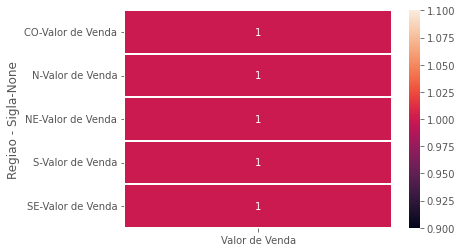

In [ ]:
plot = sns.heatmap(correlacaoJulho, annot =True, linewidths=.7)
plot;

<Font color = orange> Mês de Agosto:





In [ ]:
correlacaoAgosto = tabelaAgosto.groupby(tabelaAgosto['Regiao - Sigla']).corr()

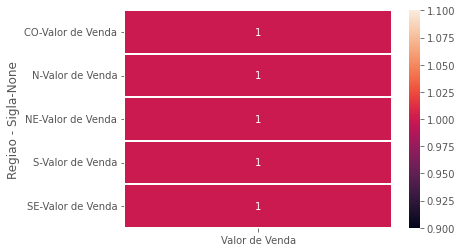

In [ ]:
plot = sns.heatmap(correlacaoAgosto, annot =True, linewidths=.7)
plot;

#<Font color = orange> 10 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


<Font color = orange> Mês de julho:

In [297]:
correlacaoJulhoBand = tabelaJulho.groupby(tabelaJulho['Bandeira']).corr()
correlacaoJulhoBand

,,Valor de Venda
Bandeira,,
ALESAT,Valor de Venda,1.0
AMERICANOIL,Valor de Venda,1.0
ATEM' S,Valor de Venda,1.0
ATLÂNTICA,Valor de Venda,1.0
BRANCA,Valor de Venda,1.0
CHARRUA,Valor de Venda,1.0
CIAPETRO,Valor de Venda,1.0
DIBRAPE,Valor de Venda,1.0
DISLUB,Valor de Venda,1.0


<Font color = orange> Mês de Agosto:

In [298]:
correlacaoAgostoBand= tabelaAgosto.groupby(tabelaAgosto['Bandeira']).corr()
correlacaoAgostoBand

,,Valor de Venda
Bandeira,,
ALESAT,Valor de Venda,1.0
AMERICANOIL,Valor de Venda,1.0
ATEM' S,Valor de Venda,1.0
ATLÂNTICA,Valor de Venda,1.0
BRANCA,Valor de Venda,1.0
CHARRUA,Valor de Venda,1.0
CIAPETRO,Valor de Venda,1.0
DIBRAPE,Valor de Venda,1.0
DISLUB,Valor de Venda,1.0


#<font color = orange> 11 -O preço da Gasolina e do Etanol variaram em relação à data de coleta?

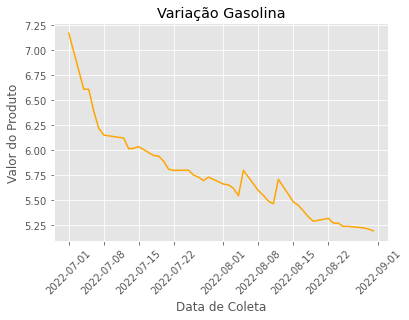

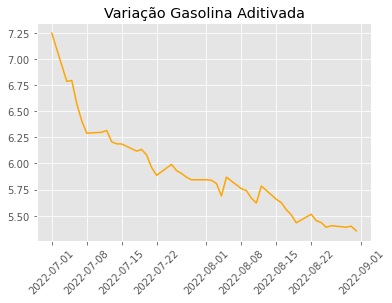

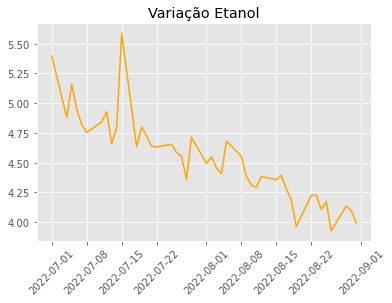

In [299]:
# Variação da Gasolina em relação à data de coleta
tabelasGasolina = concateTabelas.query('Produto == "GASOLINA"')

plt.title('Variação Gasolina')
plt.ylabel('Valor do Produto')
plt.xlabel('Data de Coleta')
plt.plot(tabelasGasolina.groupby(tabelasGasolina['Data da Coleta']).mean(),'orange')
plt.xticks(rotation=45)
plt.show();

# Variação da Gasolina Aditivada em relação à data de coleta
tabelasGasAdt = concateTabelas.query('Produto == "GASOLINA ADITIVADA"')

plt.title('Variação Gasolina Aditivada')
plt.plot(tabelasGasAdt.groupby(tabelasGasAdt['Data da Coleta']).mean(),'orange')
plt.xticks(rotation=45)
plt.show();

# Variação do Etanol em relação à data de coleta
tabelasEtanol = concateTabelas.query('Produto == "ETANOL"')

plt.title('Variação Etanol')
plt.plot(tabelasEtanol.groupby(tabelasEtanol['Data da Coleta']).mean(),'orange')
plt.xticks(rotation=45)
plt.show();

In [300]:
mediadata = concateTabelas.groupby(['Data da Coleta','Produto'], as_index = False).mean()
mediadata

,Data da Coleta,Produto,Valor de Venda
0,2022-07-01,ETANOL,5.395652
1,2022-07-01,GASOLINA,7.173200
2,2022-07-01,GASOLINA ADITIVADA,7.248261
3,2022-07-04,ETANOL,4.879523
4,2022-07-04,GASOLINA,6.612834
...,...,...,...
127,2022-08-30,GASOLINA,5.213140
128,2022-08-30,GASOLINA ADITIVADA,5.399597
129,2022-08-31,ETANOL,3.994470
130,2022-08-31,GASOLINA,5.194275


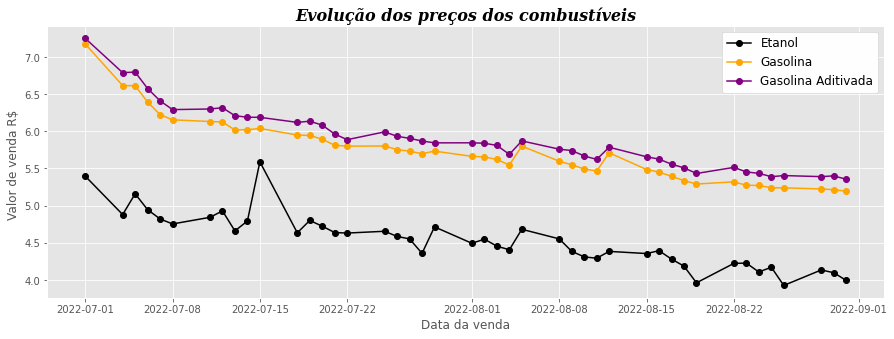

In [301]:
plt.figure(figsize=(15,5),)

plt.plot(mediadata[mediadata['Produto'] == 'ETANOL']['Data da Coleta'], mediadata[mediadata['Produto'] == 'ETANOL']['Valor de Venda'],'o-',
    label='Etanol',color='black')

plt.plot(mediadata[mediadata['Produto'] == 'ETANOL']['Data da Coleta'], mediadata[mediadata['Produto'] == 'GASOLINA']['Valor de Venda'],'o-',
    label='Gasolina',color='Orange')

plt.plot(mediadata[mediadata['Produto'] == 'ETANOL']['Data da Coleta'], mediadata[mediadata['Produto'] == 'GASOLINA ADITIVADA']['Valor de Venda'],'o-',
    label='Gasolina Aditivada',color='Purple')

plt.ylabel('Valor de venda R$ ')
plt.xlabel('Data da venda')
plt.title('Evolução dos preços dos combustíveis', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='serif' )
plt.legend(fontsize=12, frameon=True, framealpha=2, facecolor='white');

#<font color = orange> 12 - Quantos postos de gasolina existem nos municípios do estado do Rio de Janeiro?


In [302]:
#Consultando a tabela
concateTabelas.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA


In [303]:
#Inserindo em uma variavel apenas os pontos de venda de combustiveis localizados no estado do Rio de Janeiro.
selecao_rj = concateTabelas[concateTabelas['Estado - Sigla'] == 'RJ']
selecao_rj.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
23,SE,RJ,TRES RIOS,AUTO LUBRIFICADORA TRIRRIENSE LTDA,28.863.579/0001-35,CENTRO,25802-315,GASOLINA ADITIVADA,2022-07-01,7.85,R$ / litro,IPIRANGA


In [304]:
#Inserindo em uma variavel a contagem de pontos de venda de combustiveis por município.
selecao_1 = selecao_rj[['Revenda']].groupby([selecao_rj['Municipio']]).count()
selecao_1.head()

,Revenda
Municipio,
ANGRA DOS REIS,176
ARARUAMA,279
BARRA DO PIRAI,172
BARRA MANSA,237
BELFORD ROXO,271


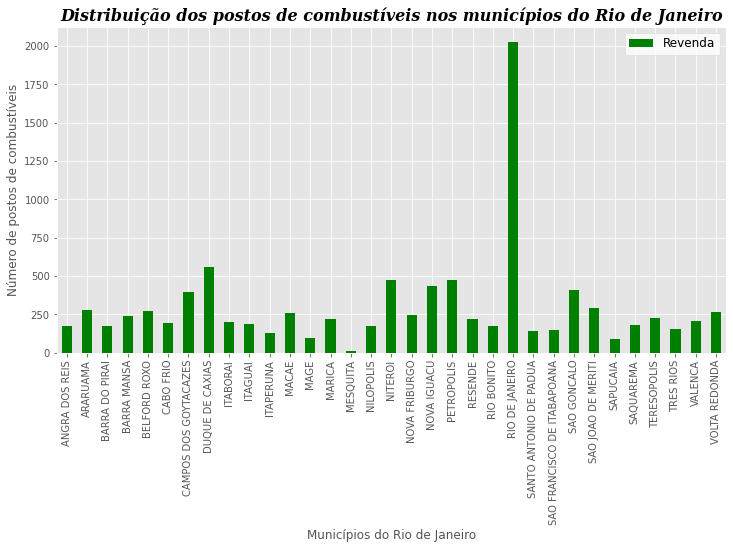

In [305]:
plt.style.use('ggplot')
grafico = selecao_1.plot(figsize=(12,6),kind='bar', color='g')
grafico.set_title('Distribuição dos postos de combustíveis nos municípios do Rio de Janeiro', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='serif' )
plt.ylabel('Número de postos de combustíveis')
plt.xlabel('Municípios do Rio de Janeiro')
plt.legend(fontsize=12, facecolor='white')
plt.show()